# Понижение размерности

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 1. Сформируйте случайную двумерную область точек

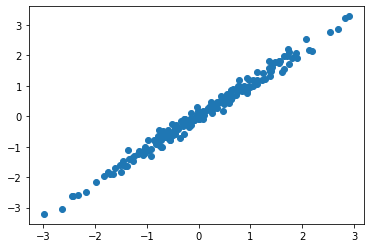

In [2]:
rng = np.random.RandomState(4)
X = np.dot(rng.rand(2, 2), rng.randn(2,200)).T
plt.scatter(X[:, 0], X[:, 1])

### 2. Используйте метод главных компонент для понижения размерности 

In [3]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
print('до понижения размерности:', X.shape)
print('после понижения размерности:', X_pca.shape)

до понижения размерности: (200, 2)
после понижения размерности: (200, 1)


### 3. Инвертируйте данные полученные после понижения размерности и выведите их на график.

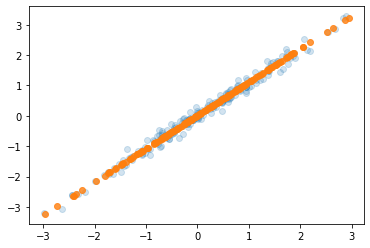

In [4]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)

Мы можем наблюдать, что зависимость стала линейной

### 4. Скачайте датасет с цифрами (load_digits)

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

1797 изображений по 64 пикселя (8*8)

### 5. Используйте метод главных компонент для понижения размерности до 2.

In [9]:
pca = PCA(n_components=2)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print('до понижения размерности:', digits.data.shape)
print('после понижения размерности:', X_pca.shape)

до понижения размерности: (1797, 64)
после понижения размерности: (1797, 2)


теперь массив пикселей каждого изображения зависит от двух чисел, обозначающих их основные характеристики

### 6. Выведите на график полученные значения.

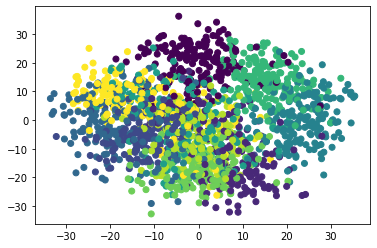

In [26]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)

данные разделились на 10 кластеров, что соответствует количеству цифр

### 7. Используйте метод главных компонент с количеством компонентов – 64.

In [27]:
pca = PCA(n_components=64)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print('до понижения размерности:', digits.data.shape)
print('после понижения размерности:', X_pca.shape)

до понижения размерности: (1797, 64)
после понижения размерности: (1797, 64)


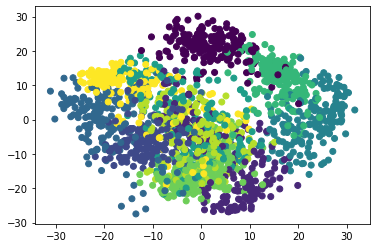

In [29]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)

разделение более четкое

### 8. Постройте график объяснимости модели в зависимости от компонентов.

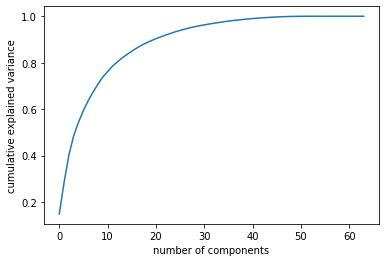

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

после 40 компонентов совокупная объясненная разница практически не меняется

### 9. Добавьте шума в датасет. Выведите на экран обычные и зашумленные данные.

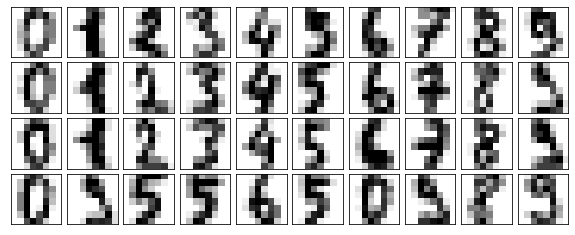

In [30]:
# функция отрисовки чисел

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

plot_digits(digits.data)

добавим шумы с нормальным распределением

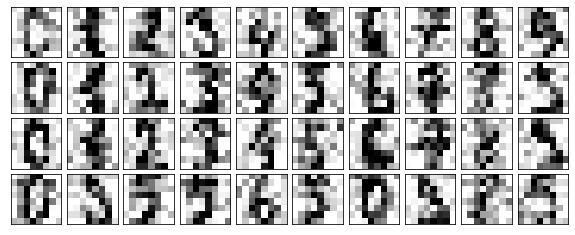

In [31]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

### 10. Найти минимальное количество компонентов необходимое для сохранения хотя бы на 50% информации о датасете.

In [34]:
pca = PCA(0.5).fit(noisy)
pca.fit(noisy)
X_pca = pca.transform(noisy)

Text(0, 0.5, 'cumulative explained variance')

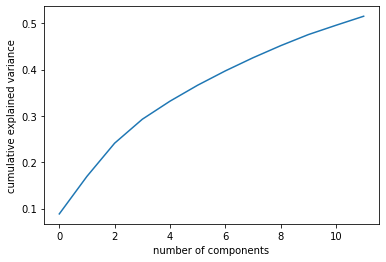

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

50% достигается примерно в 12ти компонентах

In [38]:
n = 12
np.cumsum(pca.explained_variance_ratio_)[n - 1]

0.5148965943078998

### 11. Используйте метод главных компонент для понижения размерности с количеством компонент из пункта 10.

In [39]:
pca = PCA(n_components=12)
pca.fit(noisy)
X_pca = pca.transform(noisy)
print('до понижения размерности:', X.shape)
print('после понижения размерности:', X_pca.shape)

до понижения размерности: (200, 2)
после понижения размерности: (1797, 12)


### 12. Инвертируйте данные полученные после понижения размерности и выведите их на экран.

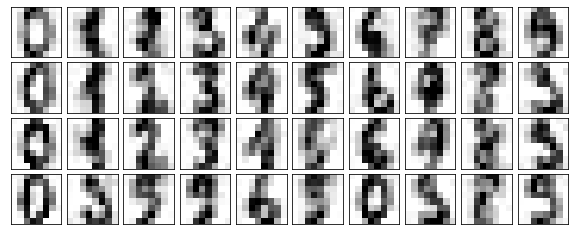

In [40]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

цифры все еще узнаваемы

### 13. Сделайте вывод о применимости модели

Модель применима, так как понижения размерности до и последующая инверсия данных эффективно уменьшает шумы